# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'cufflinks'

# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

В курсе для удобства работы с данными мы использовали Metabase. Однако Metabase — это не сама база данных, а [BI-инструмент](https://proglib.io/p/chto-takoe-bi-sistemy-i-zachem-oni-nuzhny-2021-05-10), то есть удобный интерфейс для взаимодействия с данными, которые хранятся в БД, построения отчётов и графиков. Всё это время наши данные хранились под управлением СУБД [PostgreSQL](https://blog.skillfactory.ru/glossary/postgresql/), а обращались мы к ним через запросы в Metabase.

В реальной деятельности дата-сайентисту требуется не только писать запрос к данным, но и затем обрабатывать его результаты с помощью Python. Для решения таких задач требуется некоторое средство, которое будет связывать Python и PostgreSQL так, чтобы мы могли с помощью Python отправлять запросы в Postgres и принимать оттуда результаты.

Именно таким средством является пакет [psycopg2](https://www.psycopg.org/docs/), о котором мы сейчас и поговорим.

Если при установке возникает ошибка, похожая на “connection error: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:598)”, попробуйте установить пакет следующим образом:

!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org psycopg2
***

Теперь посмотрим, как можно подключиться к нашей базе и выполнять запросы из Jupyter-ноутбука.

Для подключения нам потребуются следующие данные:

- dbname — название базы, к которой нужно подключиться;
- user — имя пользователя в СУБД;
- password — пароль;
- host — адрес, по которому нужно подключиться;
- port — порт, к которому нужно подключиться (по умолчанию равен 5432).

In [1]:
# Начинаем с импорта библиотек:
import psycopg2
import pandas as pd

In [8]:
# Создаём соединение с заданными параметрами:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

In [9]:
# Запрос:
# код запроса представляет из себя строковую переменную
n = 10
query = f'''select *
           from sql.pokemon
           limit {n}
        '''
# лучше использовать f-строки — так удобнее передавать параметры

In [10]:
# ВЫПОЛНЕНИЕ ЗАПРОСА
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/1542178668.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,id,name,type1,type2,hp,attack,defense,speed
0,1,Bulbasaur,Grass,Poison,45,49,49,45
1,2,Ivysaur,Grass,Poison,60,62,63,60
2,3,Venusaur,Grass,Poison,80,82,83,80
3,4,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,7,Charizard,Fire,Flying,78,84,78,100
5,8,CharizardMega Charizard X,Fire,Dragon,78,130,111,100
6,9,CharizardMega Charizard Y,Fire,Flying,78,104,78,100
7,16,Butterfree,Bug,Flying,60,45,50,70
8,17,Weedle,Bug,Poison,40,35,30,50
9,18,Kakuna,Bug,Poison,45,25,50,35


In [11]:
# ФИНАЛ
# не забываем закрыть соединение после окончания работы
connection.close()

***
Представьте, что вы устроились на работу в кадровое агентство, которое подбирает вакансии для IT-специалистов. Ваш первый проект — создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. Сначала вам необходимо понять, что из себя представляют данные и насколько они соответствуют целям проекта. В литературе эта часть работы над ML-проектом называется Data Understanding, или анализ данных.
***

Наш проект включает в себя несколько этапов:
- знакомство с данными;
- предварительный анализ данных;
- детальный анализ вакансий;
- анализ работодателей;
- предметный анализ.
***

Требования к оформлению ноутбука-решения:

- Решение оформляется только в Jupyter Notebook.
- Решение оформляется в соответствии с ноутбуком-шаблоном.
- Каждое задание выполняется в отдельной ячейке, выделенной под задание (в шаблоне они помечены как ваш код здесь). Не следует создавать много ячеек для решения задачи — это провоцирует неудобства при проверке.
- Текст SQL-запросов и код на Python должны быть читаемыми. Не забывайте про отступы в SQL-коде.
- Выводы по каждому этапу оформляются в формате Markdown в отдельной ячейке (в шаблоне они помечены как ваши выводы здесь).
- Выводы можно дополнительно проиллюстрировать с помощью графиков. Они оформляются в соответствии с теми правилами, которые мы приводили в модуле по визуализации данных.
- Не забудьте удалить ячейку с данными соединения перед фиксацией работы в GitHub.

***

ЗНАКОМСТВО С ДАННЫМИ

Все необходимые таблицы находятся в схеме public базы данных project_sql (именно эту базу вам необходимо указать в параметре dbname при подключении).

>Схема — это именованный набор объектов БД. В нашем случае объекты — это таблицы, но также к объектам схемы относятся представления, индексы, последовательности, типы данных, операторы и функции.

Схемы аналогичны папкам на уровне операционной системы, за исключением того, что схемы не могут быть вложенными.

>Преимущества использования схем:   
    - организуют объекты базы данных в логические группы, чтобы сделать их более управляемыми;    
    - позволяют многим пользователям использовать одну базу данных, не мешая друг другу.

Имя схемы указывается перед именем таблицы через точку.

Ранее в курсе мы работали со схемой sql, поэтому перед именем таблицы всегда писали sql.

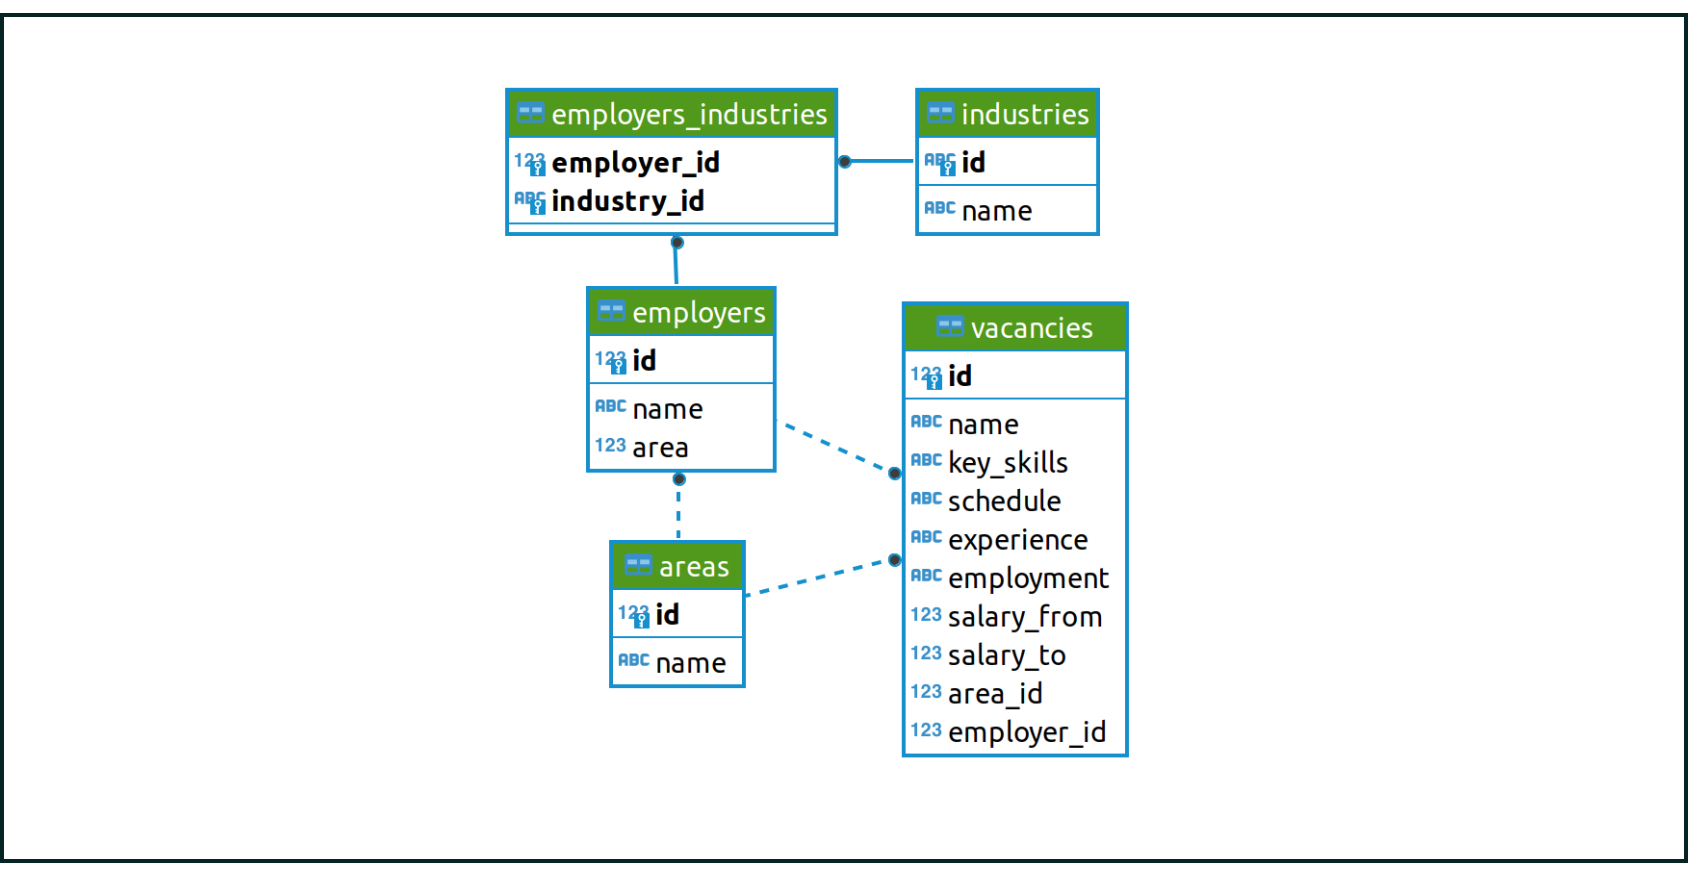

#### VACANCIES

Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:
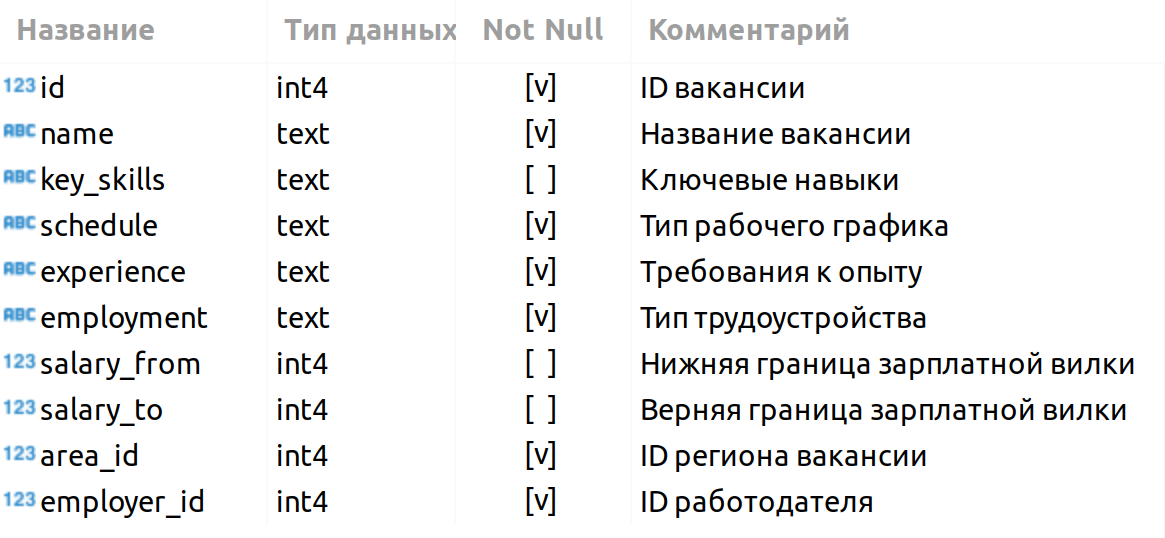

Зарплатная вилка — это верхняя и нижняя граница оплаты труда в рублях (зарплаты в других валютах уже переведены в рубли). Соискателям она показывает, в каком диапазоне компания готова платить сотруднику на этой должности.

#### AREAS

Таблица-справочник, которая хранит код региона и его название.
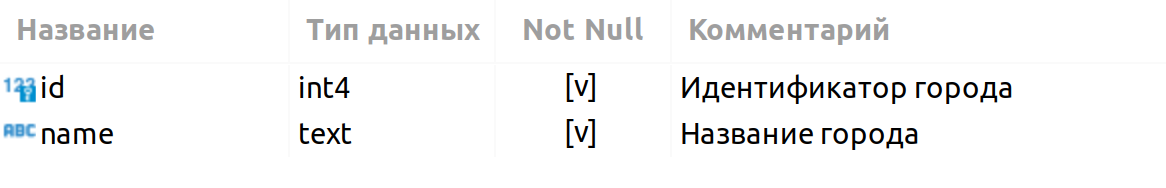

#### EMPLOYERS

Таблица-справочник со списком работодателей.
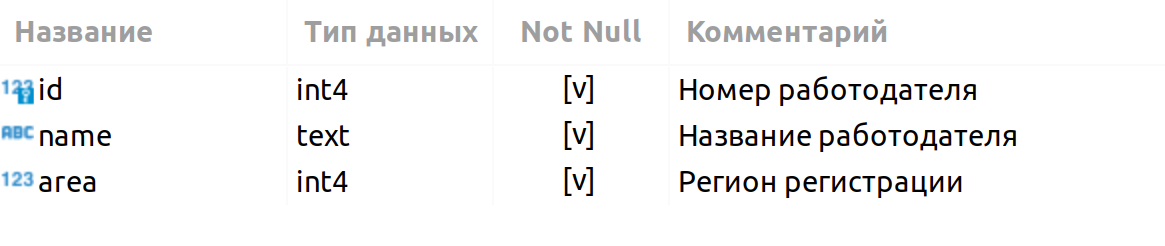

#### INDUSTRIES

Таблица-справочник вариантов сфер деятельности работодателей.
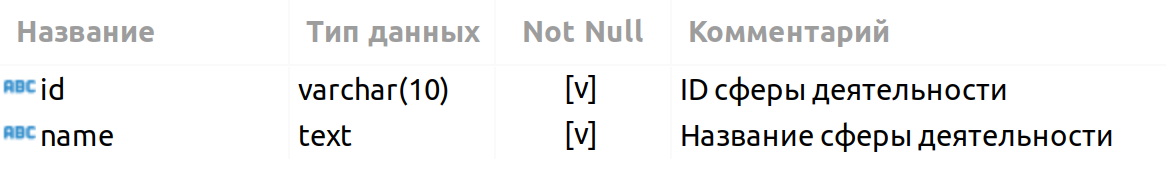

#### EMPLOYERS_INDUSTRIES

Дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.

Эта таблица нужна нам, поскольку у одного работодателя может быть несколько сфер деятельности (или работодатели могут вовсе не указать их). Для удобства анализа необходимо хранить запись по каждой сфере каждого работодателя в отдельной строке таблицы.

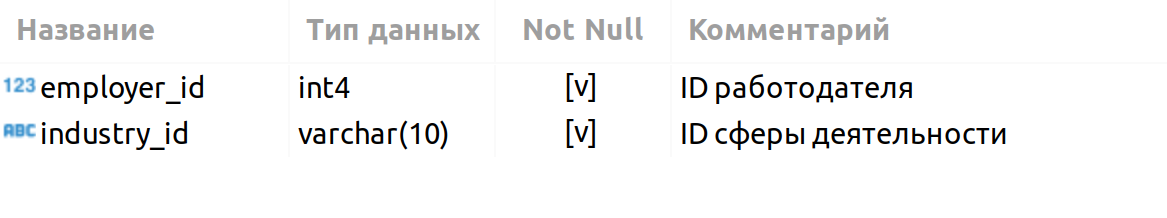

In [77]:
# Создаём соединение с заданными параметрами:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)


# Предварительный анализ данных

Сколько вакансий есть в базе?

In [21]:
# Запрос:
# код запроса представляет из себя строковую переменную
query = f'''select count(id)
           from VACANCIES
         '''
# лучше использовать f-строки — так удобнее передавать параметры

In [22]:
# ВЫПОЛНЕНИЕ ЗАПРОСА
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/1542178668.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,49197


In [23]:
# Сколько работодателей?
query = f'''select count(id)
           from EMPLOYERS
         '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/3444327384.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,23501


In [27]:
# Сколько регионов?
query = f'''select count(id)
           from AREAS
         '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/3432511623.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1362


In [28]:
# Сколько сфер деятельности?
query = f'''select count(id)
           from INDUSTRIES
         '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/3288191830.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,294


# Детальный анализ вакансий

Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).

Выберите пятёрку лидеров по количеству вакансий:

In [35]:
query = f'''select count(v.id) cnt, a.name area
           from VACANCIES v
           join AREAS a on v.area_id = a.id
           group by a.name
           order by 1 desc
           limit 5
         '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/2988092246.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


In [36]:
# Посмотрим на зарплаты. У какого количества вакансий заполнено хотя бы одно из 
# двух полей с зарплатой?
query = f'''select count(*)
           from VACANCIES
           where salary_from is not NULL or salary_to is not NULL
         '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/520356908.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,24073


In [41]:
# Найдите средние значения для нижней и верхней границы зарплатной вилки. 
# Округлите значения до целого числа.
query = f'''select avg(salary_from) down, avg(salary_to) up
           from VACANCIES
         '''
df = round(pd.read_sql_query(query, connection))
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/2856847559.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,down,up
0,71065.0,110537.0


In [45]:
# Напишите запрос, который выведет количество вакансий для каждого сочетания типа 
# рабочего графика (schedule) и типа трудоустройства (employment), используемого в 
# вакансиях. Какая пара находится на втором месте по популярности?
query = f'''select schedule, employment, count(id)
           from VACANCIES
           group by 1, 2
           order by 3 desc
           limit 2
         '''
df = round(pd.read_sql_query(query, connection))
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/3007822965.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802


In [44]:
# Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в 
# порядке возрастания количества вакансий, в которых указан данный вариант опыта.
query = f'''select experience, count(id)
           from VACANCIES
           group by 1
           order by 2 
           '''
df = round(pd.read_sql_query(query, connection))
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_11163/664585618.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


# Анализ работодателей

Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [82]:
query = f'''select e.name, count(v.id)
           from VACANCIES v 
           join EMPLOYERS e on v.employer_id = e.id
           group by 1
           order by 2 
           limit 5
           '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/3079321942.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


InterfaceError: connection already closed

In [5]:
# Напишите запрос, который для каждого региона выведет количество работодателей и 
# вакансий в нём. 
# Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество 
# работодателей. Впишите его название в поле ниже в том виде, который вернул запрос.
query = f'''select a.name, count(v.id) vaca, count(distinct e.id) employers_count
            from areas a
            left join employers e ON e.area = a.id
            left join vacancies v ON v.area_id = a.id
            where v.id is null
            group by a.id
            order by 3 desc
           '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/2120191010.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,vaca,employers_count
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


In [12]:
# Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии.
# Выберите максимальное значение из получившегося списка.
query = f'''select  employer_id, count(distinct area_id)
        from VACANCIES  
        group by employer_id 
        order by 2 desc
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/3026044052.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employer_id,count
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88
4,3682876,71
...,...,...
14901,810278,1
14902,810313,1
14903,810551,1
14904,810688,1


In [25]:
# Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.
query = f'''select count(*)
        from EMPLOYERS e
        left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
        left join INDUSTRIES i on ei.industry_id = i.id
        where i.name is null
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/581652806.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,8419


In [31]:
# Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в 
# алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.
query = f'''select e.name, count(i.name)
        from EMPLOYERS e
        left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
        left join INDUSTRIES i on ei.industry_id = i.id
        group by 1
        having count(i.name) = 4
        order by 1 
        offset 2
        limit 1
        '''
df = pd.read_sql_query(query, connection)
df


/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/2820471060.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,2ГИС,4


In [34]:
# С помощью запроса выясните, у какого количества работодателей в качестве сферы 
# деятельности указана «Разработка программного обеспечения».
query = f'''select count(e.id)
        from EMPLOYERS e
        left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
        left join INDUSTRIES i on ei.industry_id = i.id
        Where i.name = 'Разработка программного обеспечения'
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/1479637471.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


Для компании «Яндекс» выведите список регионов-миллионников , в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании, собранных в этой таблице. Должна получиться выборка такого вида (приведён пример результата для компании SberTech): 


In [30]:
import pandas as pd

tableau = pd.read_html(url)
# pd.read_html('http://ru.wikipedia.org/wiki/Города-миллионеры_России', encoding='utf-8')

In [90]:
# У нас есть ссылка на города, но там присуствует кирилица 
# Загружаем библиотеку для парсинга URL
import urllib.parse as req
# Считываем наш URL (здесь у нас )
cities = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России')
# Мы считали данные, они у нас бъются на 6 параметров (индексов), смотрим какой нам
# надо изменить (параметр path (индекс 2))
display(cities)
# С помощью quote заменяем специальные символы (кирилицу) на ASCII символы 
update = req.quote(cities[2])
# Здесь используем конструктор urljoin он находит соответсвия в параметрах и 
# конструирует URL заново вместе с преобразованным параметром
url = req.urljoin('https://ru.wikipedia.org/wiki/Города-миллионеры_России', con)
# Считываем URL страницу
tableau = pd.read_html(url)

ParseResult(scheme='https', netloc='ru.wikipedia.org', path='/wiki/Города-миллионеры_России', params='', query='', fragment='')

In [110]:
# Просмотрев информацию мы определили что нужная нам информация находится в индексе 1
tableau[1]

,№,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел. (итоги переписи 2010 года)[6]"
0,1,Москва,13 098,13 010,"13,1 %",11 504
1,2,Санкт-Петербург,5 598,5 602,"14,8 %",4 880
2,3,Новосибирск,1 635,1 634,"10,9 %",1 474
3,4,Екатеринбург,1 539,1 544,"14,4 %",1 350
4,5,Казань,1 315,1 309,"14,4 %",1 144
5,6,Нижний Новгород,1 213,1 226,NaN,1 251
6,7,Красноярск,1 197,1 188,"21,6 %",977
7,8,Челябинск,1 183,1 190,"5,3 %",1 130
8,9,Самара,1 164,1 173,"0,3 %",1 169
9,10,Уфа,1 158,1 145,"7,8 %",1 062


In [108]:
for i in tableau[1]['Город']:
    print(i)

Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Казань
Нижний Новгород
Красноярск
Челябинск
Самара
Уфа
Ростов-на-Дону
Краснодар
Омск
Воронеж
Пермь
Волгоград


In [117]:
st = tuple(tableau[1]['Город'])
st

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [ ]:
query = f'''WITH temp AS(
            select 
                a.name, 
                count(*) cnt
            
            from vacancies v
                join areas a on v.area_id = a.id
                join employers e on v.employer_id = e.id
            
            where e.name = 'Яндекс' 
                  and a.name IN {st}
            
            group by a.name
            )

SELECT *

FROM temp

UNION ALL

SELECT 'Total', sum(cnt)  

FROM temp
'''


In [47]:
query = f'''select 
                a.name, 
                count(v.id) cnt
            
            from vacancies v
            join areas a on v.area_id = a.id
            join employers e on v.employer_id = e.id
            
            where e.name = 'Яндекс' and a.name IN {st}
        group by a.name

        union all
        select 'Total', sum(cnt)
        from (select count(v.id) cnt
            from vacancies v
                join areas a on v.area_id = a.id
                join employers e on v.employer_id = e.id
            where e.name = 'Яндекс' and a.name in {st}) as query
         '''
df = pd.read_sql_query(query, connection)
print(len(df))
display(df)

17


/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/4116811083.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,cnt
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


# Предметный анализ

Переходим к самому интересному — нам предстоит исследовать требования работодателей к дата-сайентистам

Сколько вакансий имеет отношение к данным (содержит слова 'data' или 'данн')

In [52]:
query = f'''select name
            from vacancies
            WHERE lower(name) ILIKE '%data%' OR lower(name) ILIKE '%данн%'
        '''
df = pd.read_sql_query(query, connection)
print(len(df))
display(df)

1771


/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/2466968734.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,Аналитик хранилищ данных и BI-систем/Аналитик ...
1,Data-analysts (удаленно)
2,Стажер Data Engineer/Data Аналитик в команду Б...
3,Старший специалист хранилищ данных
4,Администратор баз данных и сетей
...,...
1766,Программист Delphi / разработчик баз данных
1767,Разработчик баз данных (Big Data)
1768,Аналитик данных
1769,Data аналитик /Аналитик BI (удаленно)


Сколько есть подходящих вакансий для начинающего дата-сайентиста?

Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:

- ‘data scientist’;
- ‘data science’;
- ‘исследователь данных’;
- ‘ML’ (здесь не нужно брать вакансии по HTML);
- ‘machine learning’;
- ‘машинн%обучен%’.

В следующих заданиях мы продолжим работать с вакансиями по указанному выше условию (уже не учитывая вакансии уровня Junior).

Считаем вакансиями для специалистов уровня Junior следующие:

- в названии есть слово “junior” или
- требуемый опыт — «Нет опыта» или
- тип трудоустройства — «Стажировка».

В качестве ответа запишите количество вакансий, которое вернул запрос.

In [65]:
query = f'''SELECT count(*)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' 
            OR name ILIKE '%data science%' OR name ILIKE '%исследователь данных%' 
            OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') 
            OR name ILIKE '%machine learning%' OR name ILIKE '%машинн%обучен%')
            and (name ilike '%junior%' or experience ilike '%Нет опыта%' 
            or employment ilike '%Стажировка%')
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/3907195133.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51


In [72]:
# Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?
# В качестве ответа запишите количество, которое вернул запрос.
# %ML% - учет вакансий в название которых есть ML (like в текущем регистре)
query = f'''SELECT count(*)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' 
                OR name ILIKE '%data science%' 
                OR name ILIKE '%исследователь данных%' 
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
                OR name ILIKE '%machine learning%' 
                OR name ILIKE '%машинн%обучен%')
                AND (key_skills ILIKE '%SQL%' or key_skills ILIKE '%postgres%')
        '''
df = pd.read_sql_query(query, connection)
df


/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/648021114.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,201


In [74]:
# С помощью запроса, аналогичного предыдущему, проверьте, насколько популярен Python 
# в требованиях работодателей к DS. Вычислите количество вакансий, 
# в которых в качестве ключевого навыка указан Python.
query = f'''SELECT count(*)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' 
                OR name ILIKE '%data science%' 
                OR name ILIKE '%исследователь данных%' 
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
                OR name ILIKE '%machine learning%' 
                OR name ILIKE '%машинн%обучен%')
                AND key_skills ILIKE '%Python%'
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/2664317981.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,351


In [79]:
# Сколько ключевых навыков в среднем указывают в вакансиях для DS?
# Ответ округлите до двух знаков после точки-разделителя.
# lenght - подсчитываем количество символов в строке, затем replace убираем символ
# CHR(9) (в данном случае символ разделения между навыками), и считаем разницу и узнаем 
# кол-во табуляций и прибавляем + 1 узнаем - кол-во навыков в строке
query = f'''SELECT round(avg(length(key_skills)-length(replace(key_skills, 
                                                        CHR(9), ''))+1), 2)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' 
                OR name ILIKE '%data science%' 
                OR name ILIKE '%исследователь данных%' 
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
                OR name ILIKE '%machine learning%' 
                OR name ILIKE '%машинн%обучен%')
                AND key_skills IS NOT NULL
        '''
df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/598382989.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,6.41


Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля experience).

При решении задачи примите во внимание следующее:

- Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
- Если заполнены оба поля с зарплатой, считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, его и считаем зарплатой по вакансии.
- Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null).
- Чтобы избежать этой ситуации, мы воспользуемся функцией coalesce , которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос select 1 + coalesce(null, 0).

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [80]:
# Используем coalesce, он возврашает 1-е значение, которое имеет not null,
# В данной строке 3 позиций - он смотрит каждую и если видит что там нет NULL, то
# то возврашает ее, сумма у нас поставленна 1 значением - т/к если там все ок, то она и
# возврашается. Если есть проблемы, то идем дальше и смотрим там (в where у нас 
# указанно, что что-то будет без NULL)
query = f'''SELECT ROUND(AVG(coalesce((salary_from+salary_to)/2, salary_from, 
                                                            salary_to, 0)))
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' 
                OR name ILIKE '%data science%' 
                OR name ILIKE '%исследователь данных%' 
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%') 
                OR name ILIKE '%machine learning%' 
                OR name ILIKE '%машинн%обучен%')
                AND (salary_from is not NULL or salary_to is not NULL)
                AND experience = 'От 3 до 6 лет'        '''

df = pd.read_sql_query(query, connection)
df

/var/folders/sp/z118b5q542bdp76qk0rqbjc80000gn/T/ipykernel_14794/3263063861.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,243115.0


In [81]:
# ФИНАЛ
# не забываем закрыть соединение после окончания работы
connection.close()

# Итоги и финальное задание

>Мы с вами проделали огромную работу по анализу вакансий. Однако расчёты, запросы или данные сами по себе, какими бы ценными они ни были, бесполезны без должных выводов. Для развёрнутого анализа данных по вакансиям у нас уже есть всё необходимое — осталось лишь привести всё это в законченную, логичную форму.

Сделайте выводы не только на основе данных: попробуйте также проанализировать, за счёт чего получились именно такие цифры, постарайтесь увидеть тенденции, сделать прогнозы. Там, где это потребуется, проведите дополнительные исследования данных.

Необходимо сделать как отдельные выводы по результатам каждого блока заданий, так и один общий вывод по всем вакансиям, имеющимся в базе данных:

- Каких вакансий много?
- Что можно сказать о рынке труда в различных городах?
- Какие ещё интересные исследования можно провести?
- Вы можете добавить любые свои рассуждения и умозаключения, к которым пришли в процессе работы. 
***
Пример того, какие выводы можно сделать, если наша задача — узнать, какой товар приносит максимум прибыли компании.

Запрос даёт нам ответ — максимум прибыли приносит принтер Canon.

Какой вывод мы здесь можем сделать? Например, такой ↓

→ По результатам запроса мы поняли, что больше всего прибыли приносит принтер Canon. В 2012 году он принёс N у.е.

Этого достаточно? Не совсем.

→ Стоит указать также, что данный принтер принёс так много денег не потому, что он очень популярен, а потому, что у него достаточно высокая цена.

→ Для совсем уж отличного вывода можно добавить, к примеру, что его продажи падают из месяца в месяц и, возможно, нам стоит задуматься о закупках более современной модели.
***

Для завершения проекта вам осталось выложить ноутбук на GitHub и отправить ссылку на него.

Формат ноутбука с решением:

- Номер задания.
- Код для получения ответа.
- Результат запроса.
- Выводы по блоку заданий.
- Общий вывод в конце по результатам анализа, имеющихся данных по вакансиям.

Важно не просто высчитать результат, но и написать оптимальный запрос (для этого мы делаем код-ревью), а также оформить его корректно — так, как оформляется документация и спецификации в реальных кейсах. Не забывайте про комментарии в запросах.

>Код-ревью — достаточно распространённая практика, которая позволяет Junior- и Middle-специалистам получать советы от более опытных коллег и расти в профессиональном плане.

КРИТЕРИИ ОЦЕНИВАНИЯ:

- 2 балла	Правильность решения задач, логичность построения запросов.
- 2 балла	Читабельность и верное форматирование запросов и кода на Python, наличие комментариев в запросах; аккуратность оформления решения.
- 2 балла	Логичность и полнота выводов.
- 2 балла	Дополнительные исследования данных.

Максимальное количество баллов за задание — 8.
